In [8]:
import sys


sys.path.append("/home/tigerofmurder/cursos/EDA/quadtree/")

print(sys.path)


['/home/tigerofmurder/CURSOS/EDA/quadtree', '/home/tigerofmurder/anaconda3/lib/python37.zip', '/home/tigerofmurder/anaconda3/lib/python3.7', '/home/tigerofmurder/anaconda3/lib/python3.7/lib-dynload', '', '/home/tigerofmurder/anaconda3/lib/python3.7/site-packages', '/home/tigerofmurder/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/tigerofmurder/.ipython', '/home/tigerofmurder/cursos/EDA/quadtree/']


In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt


img= cv2.imread('thresh1.png')
cv2.imshow('Coverted Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.axis("on")
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
height, width,c = img.shape
print(height,width)

for y in range(0,width):
    for x in range(0,height):
        value_thr = 170
        value_default = 140
        if (img[x,y,0] > value_thr and img[x,y,0] < value_default and
            img[x,y,1] > value_thr and img[x,y,1] < value_default and
            img[x,y,2] > value_thr and img[x,y,2] < value_default):
            img[x,y,0] = 0
            img[x,y,1] = 0
            img[x,y,2] = 0

        else:
            img[x,y,0] = 255
            img[x,y,1] = 255
            img[x,y,2] = 255

cv2.imshow('Coverted Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<Figure size 640x480 with 1 Axes>

260 200


In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt


img= cv2.imread('thresh1.png')
plt.axis("on")
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
height, width,c = img.shape
print(height,width)

for y in range(0,width):
    for x in range(0,height):
        value_thr = 180
        if (img[x,y,0] > value_thr and img[x,y,1] > value_thr and img[x,y,2] > value_thr):
            img[x,y,0] = 0
            img[x,y,1] = 0
            img[x,y,2] = 0

        else:
            img[x,y,0] = 255
            img[x,y,1] = 255
            img[x,y,2] = 255

cv2.imshow('Coverted Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.axis("on")
img = cv2.imread('thresh1.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
y = plt.hist(img.flatten(),256,[0,256], color = 'r')
#y = plt.hist(x,10)  
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
print (y)

<Figure size 640x480 with 1 Axes>

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,

s 1   1
s 2   3
s 3   4
s 4   5
s 5   6
s 6   6
s 7   6
s 8   7
[790, 1023, 850, 656, 329, 245, 122, 81]
0.19287109375


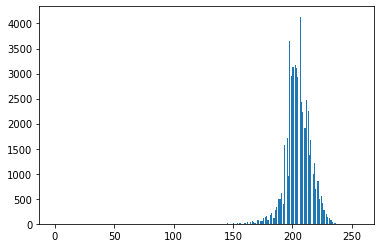

In [4]:
def sn(L,n,Pn):
    L = L-1
    Pr = 0
    for i in range(0,n,1):
        Pr += Pn[i]
    return L*Pr

def Pn(L,size,pn):
    for x in L:
        pn.append(x/size)

L = [790,1023,850,656,329,245,122,81]
pn = []
Pn(L,4096,pn)
for i in range (1,len(L)+1):
    print("s",i," ",int(sn(len(L),i,pn)))
    

print(L)
print(pn[0])



imgc= cv2.imread('thresh1.png')
img = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
height, width = img.shape
size = height * width

plt.axis("on")
y = plt.hist(img.ravel(),256,[0,256])
plt.show()



